In [ ]:
#Importamos las librerías
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels_df = pd.read_excel('/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/Etiquetas_Flores.xlsx') # Es el archivo de excel

In [ ]:
#visualizamos el archivo
labels_df.head()

,WhatsApp Image 2024-09-20 at 10.51.06 AM (1),flor
0,WhatsApp Image 2024-09-20 at 10.51.06 AM,orquidea
1,WhatsApp Image 2024-09-20 at 10.51.07 AM (1),orquidea
2,WhatsApp Image 2024-09-20 at 10.51.07 AM,flor
3,WhatsApp Image 2024-09-20 at 10.51.08 AM (1),flor
4,WhatsApp Image 2024-09-20 at 10.51.08 AM,orquidea


In [ ]:
#Separamos los nombres de archivos de las etiquetas
filenames = labels_df.iloc[:,0].values #Nombres
labels = labels_df.iloc[:,1].values #Etiquetas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Codificamos las etiquetas
#Instanciamos el codificador
label_encoder = LabelEncoder()
#Aplicamos la doficiación en las etiquetas
labels = label_encoder.fit_transform(labels)

In [ ]:
#Aplicamos el one_hot encoding para tener las salidas requeridas por el softmaz
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=2)

In [ ]:
#Ajustamos la resolución de las imágenes para homogenizar y abajar la carga computacional del procesamiento
#Definimos el tamaño
img_size = (128,128)

In [ ]:
#Definimos una función de carga y procesamiento de las imágenes

def load_and_preprocess_image(filename, img_size):
  #Abrimos y cargamos cada imagen en la variable img
    img = Image.open(filename)
    #cambiamos el tamaño de la imagen
    img = img.resize(img_size)
    #Ponemos los valores de intensidad entre 0 y 1
    img = np.array(img).astype('float32') / 255
    if img.shape[-1] == 4: #Comprobamos si existe canal alfa
      img = img[...,:3]
    return img # The return is outside the if block

In [ ]:
#cargamos las imágenes desde nuestro sistema de archivos

#agregamos la extensión a cada nombre de la imagen
filenames_with_extension = [fname + ".jpeg" for fname in filenames]
#difinimos el directorio con las imágenes
image_dir = '/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/Flores'
#cargamos las imágenes
images = np.array([load_and_preprocess_image(os.path.join(image_dir,
                                                          fname),img_size) for fname in filenames_with_extension])


In [ ]:
images.shape

(16, 128, 128, 3)

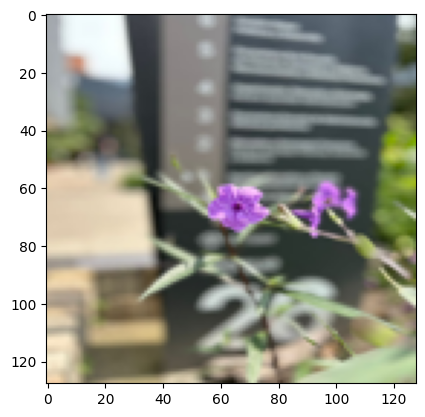

In [ ]:
#si queremos las imágenes del conjunto de datos (no las matrices numéricas)
import matplotlib.pyplot as plt
plt.imshow(images[10,:,:,:]);

In [ ]:
#Dividimos nuestro conjunto de imágnes en train y test

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

In [ ]:
#Aplanamos las imágenes
train_images = train_images.reshape((train_images.shape[0], img_size[0] * img_size[1] * 3))
test_images = test_images.reshape((test_images.shape[0], img_size[0] * img_size[1] * 3))

In [ ]:
train_images.shape

(12, 49152)

In [ ]:
from threading import active_count
#Construimos el modelo de red neuronal
#Definimos que el modelo será secuencial (una capa después de la otra)
model = models.Sequential()
#Agregamos las capas de la red
model.add(layers.Dense(128, activation= 'relu', input_shape = (img_size[0]*img_size[1]*3,)))#Entrada
model.add(layers.Dense(2, activation = 'softmax')) #Salida

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compilamos el modelo
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Entrenemos el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.6524 - val_accuracy: 0.0000e+00 - val_loss: 7.9412
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5000 - loss: 3.7132 - val_accuracy: 1.0000 - val_loss: 2.9802e-08
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 10.6019 - val_accuracy: 1.0000 - val_loss: 0.6608
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.6667 - loss: 0.6268 - val_accuracy: 1.0000 - val_loss: 0.2845
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5000 - loss: 0.6735 - val_accuracy: 0.2500 - val_loss: 0.7103
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5000 - loss: 0.6769 - val_accuracy: 0.5000 - val_loss: 0.6701
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 1.0000 - loss: 0.6092 - val_accuracy: 1.0000 - val_loss: 0.5346
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5000 - loss: 0.5946 - val_accuracy: 0.5000 - val_l

In [ ]:
#Evaluamos el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2500 - loss: 0.7270
Test accuracy: 0.25
